In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

# Importing Dependencies
This section imports necessary libraries and modules for data manipulation, visualization, and deep learning tasks. Here's what each import does:

- numpy (aliased as np): A library for numerical operations in Python.
- pandas (aliased as pd): A library for data manipulation and analysis.
- Path from pathlib: Provides classes representing filesystem paths.
- os.path: Provides functions to interact with the filesystem paths.
- matplotlib.pyplot (aliased as plt): A plotting library for creating visualizations.
- tensorflow (aliased as tf): An open-source machine learning framework.
- load_img and img_to_array from tensorflow.keras.preprocessing.image: Functions for loading images and - converting them to arrays, respectively.


In [34]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


# Train, Test, Validation list
This part of the code walks through the directory structure of the input directory (/kaggle/input in this case) and prints the path of each file. 

In [35]:
# Create a list with the filepaths for training and testing
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [36]:
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [37]:
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

# Function for creating Dataframes

This function image_processing is defined to create a DataFrame containing file paths and corresponding labels for the images. It takes a list of file paths as input, extracts labels from the file paths, creates a DataFrame with file paths and labels, shuffles the DataFrame, and returns the shuffled DataFrame.



In [38]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

# Creating Dataframes

This part of the code calls the image_processing function to create DataFrames for the training, testing, and validation datasets using their respective file paths.

In [39]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

# Train dataset

In [40]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['tomato' 'bell pepper' 'spinach' 'lemon' 'cabbage' 'cauliflower' 'corn'
 'watermelon' 'pomegranate' 'chilli pepper' 'grapes' 'peas' 'sweetpotato'
 'paprika' 'eggplant' 'onion' 'kiwi' 'carrot' 'orange' 'raddish'
 'pineapple' 'cucumber' 'banana' 'soy beans' 'apple' 'lettuce' 'sweetcorn'
 'garlic' 'capsicum' 'mango' 'jalepeno' 'beetroot' 'ginger' 'pear'
 'turnip' 'potato']


In [41]:
train_df.head(5)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,tomato
1,../input/fruit-and-vegetable-image-recognition...,bell pepper
2,../input/fruit-and-vegetable-image-recognition...,spinach
3,../input/fruit-and-vegetable-image-recognition...,lemon
4,../input/fruit-and-vegetable-image-recognition...,cabbage


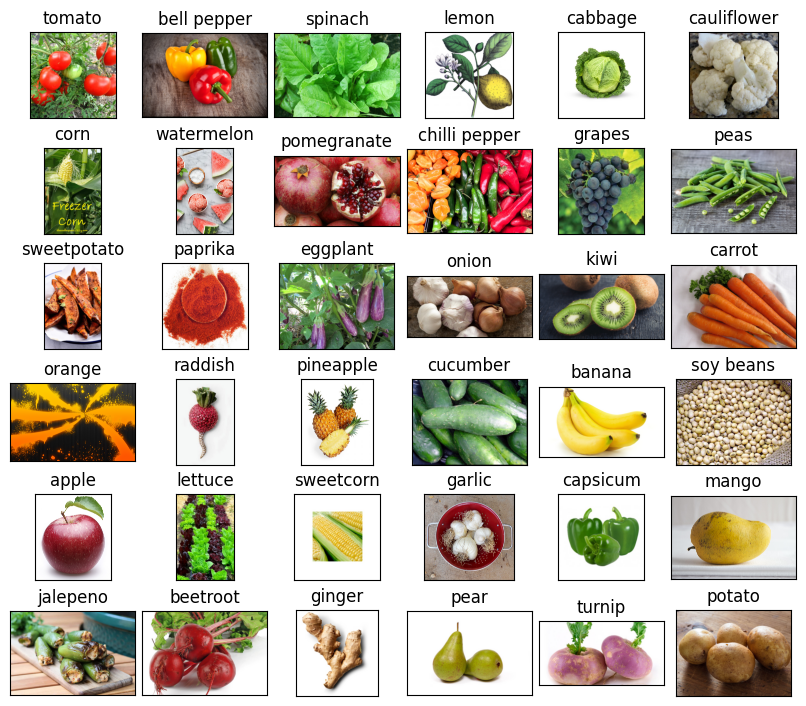

In [42]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# Data Generators

Data generators are initialized using tf.keras.preprocessing.image.ImageDataGenerator. These generators preprocess images using the MobileNetV2 preprocessing function and yield batches of data during model training and evaluation.



In [43]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [44]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [45]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [46]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


# Model Building

- In this section, a pre-trained MobileNetV2 model is loaded without the top classification layers (include_top=False) and with weights pre-trained on ImageNet (weights='imagenet'). The model's input shape is specified as (224, 224, 3), corresponding to the image dimensions and channels. The pooling='avg' parameter indicates global average pooling. The model's weights are set to non-trainable to freeze the pre-trained layers.

- Additional layers are added on top of the pre-trained model to adapt it to the specific classification task. Two dense layers with ReLU activation functions are added, followed by an output layer with a softmax activation function to output class probabilities.

- The model is then compiled with the Adam optimizer, categorical cross-entropy loss function (since it's a multi-class classification problem), and accuracy metric for evaluation.

In [47]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# Model Training

In this part, the model is trained using the fit method. Training data (train_images) and validation data (val_images) generators are provided, along with batch size, number of epochs, and early stopping callback. The training history is stored in the history variable for later analysis and visualization.



In [48]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/87 ━━━━━━━━━━━━━━━━━━━━ 18:46 13s/step - accuracy: 0.0000e+00 - loss: 3.8860

W0000 00:00:1713772810.778300     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


61/87 ━━━━━━━━━━━━━━━━━━━━ 17s 666ms/step - accuracy: 0.2721 - loss: 2.8998

W0000 00:00:1713772850.691264     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


86/87 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.3362 - loss: 2.6257

W0000 00:00:1713772870.986022     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 810ms/step - accuracy: 0.3405 - loss: 2.6071 - val_accuracy: 0.8503 - val_loss: 0.5328
Epoch 2/5


W0000 00:00:1713772880.353729     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 748ms/step - accuracy: 0.8108 - loss: 0.6092 - val_accuracy: 0.8892 - val_loss: 0.3087
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 749ms/step - accuracy: 0.8910 - loss: 0.3296 - val_accuracy: 0.9401 - val_loss: 0.2441
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 748ms/step - accuracy: 0.9300 - loss: 0.2250 - val_accuracy: 0.9581 - val_loss: 0.2169
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 71s 755ms/step - accuracy: 0.9543 - loss: 0.1426 - val_accuracy: 0.9521 - val_loss: 0.1779


# Model Evaluation

Here, the trained model is evaluated on the test dataset. Predictions are made using the predict method on the test images. The predicted labels are obtained by taking the index of the maximum probability for each prediction axis (axis=1).



In [49]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

 1/11 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step

W0000 00:00:1713773167.312278     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step 


W0000 00:00:1713773178.063134     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


['ginger',
 'cabbage',
 'bell pepper',
 'orange',
 'lettuce',
 'pomegranate',
 'ginger',
 'potato',
 'carrot',
 'pomegranate',
 'pomegranate',
 'banana',
 'pear',
 'raddish',
 'bell pepper',
 'kiwi',
 'tomato',
 'paprika',
 'soy beans',
 'garlic',
 'turnip',
 'watermelon',
 'pear',
 'sweetpotato',
 'tomato',
 'raddish',
 'capsicum',
 'banana',
 'cucumber',
 'soy beans',
 'peas',
 'soy beans',
 'beetroot',
 'soy beans',
 'jalepeno',
 'lemon',
 'paprika',
 'turnip',
 'chilli pepper',
 'sweetcorn',
 'pear',
 'cabbage',
 'corn',
 'cabbage',
 'garlic',
 'garlic',
 'pineapple',
 'grapes',
 'peas',
 'raddish',
 'soy beans',
 'grapes',
 'cauliflower',
 'cucumber',
 'apple',
 'pomegranate',
 'garlic',
 'turnip',
 'pineapple',
 'watermelon',
 'beetroot',
 'lemon',
 'pineapple',
 'cauliflower',
 'orange',
 'cabbage',
 'grapes',
 'turnip',
 'bell pepper',
 'beetroot',
 'ginger',
 'mango',
 'cucumber',
 'cauliflower',
 'lemon',
 'soy beans',
 'onion',
 'sweetpotato',
 'mango',
 'apple',
 'watermelo

# Image Prediction Function

-This function, named output, takes the location of an image as input, loads the image, preprocesses it, predicts its label using the trained model, and returns the predicted category. It resizes the image to the required input shape, converts it to an array, normalizes pixel values, and makes predictions using the model. Finally, it maps the predicted class index to the corresponding label using the labels dictionary.

In [50]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [51]:
img = output('../input/fruit-and-vegetable-image-recognition/test/cabbage/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


'cabbage'

# Saving the model

This line of code saves the trained model to a file named "FV.h5" using the HDF5 format. This file can later be loaded to perform inference or further training.

In [52]:
model.save('FV.h5')

#  Loading the model and Image Prediction and Calorie Information

- This section defines functions for fetching calorie information from Google search and predicting the category of an input image using the loaded model. 
- The run function prompts the user to input the path of an image, predicts its category, determines whether it's a fruit or vegetable, and fetches calorie information if available. 



In [55]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.models import load_model
import requests
from bs4 import BeautifulSoup

model = load_model('FV.h5')
labels = {0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot',
          7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger',
          14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce',
          19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple',
          26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn',
          32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}

fruits = ['Apple', 'Banana', 'Bello Pepper', 'Chilli Pepper', 'Grapes', 'Jalepeno', 'Kiwi', 'Lemon', 'Mango', 'Orange',
          'Paprika', 'Pear', 'Pineapple', 'Pomegranate', 'Watermelon']
vegetables = ['Beetroot', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Corn', 'Cucumber', 'Eggplant', 'Ginger',
              'Lettuce', 'Onion', 'Peas', 'Potato', 'Raddish', 'Soy Beans', 'Spinach', 'Sweetcorn', 'Sweetpotato',
              'Tomato', 'Turnip']


def fetch_calories(prediction):
    try:
        url = 'https://www.google.com/search?&q=calories in ' + prediction
        req = requests.get(url).text
        scrap = BeautifulSoup(req, 'html.parser')
        calories = scrap.find("div", class_="BNeawe iBp4i AP7Wnd").text
        return calories
    except Exception as e:
        print("Can't able to fetch the Calories")
        print(e)


def processed_img(img_path):
    img = load_img(img_path, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res.capitalize()


def run():
    img_path = input("Enter the path of the image: ")
    result = processed_img(img_path)
    print("Predicted: " + result)
    if result in vegetables:
        print('Category: Vegetables')
    else:
        print('Category: Fruit')
    cal = fetch_calories(result)
    if cal:
        print(cal + ' (100 grams)')


run()


Enter the path of the image:  /kaggle/input/fruit-and-vegetable-image-recognition/test/beetroot/Image_10.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Beetroot
Category: Vegetables
59 calories (100 grams)


In [56]:
run()

Enter the path of the image:  /kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_10.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: Apple
Category: Fruit
95 calories (100 grams)


In [57]:
run()

Enter the path of the image:  /kaggle/input/fruit-and-vegetable-image-recognition/test/lettuce/Image_1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: Lettuce
Category: Vegetables
5 calories (100 grams)


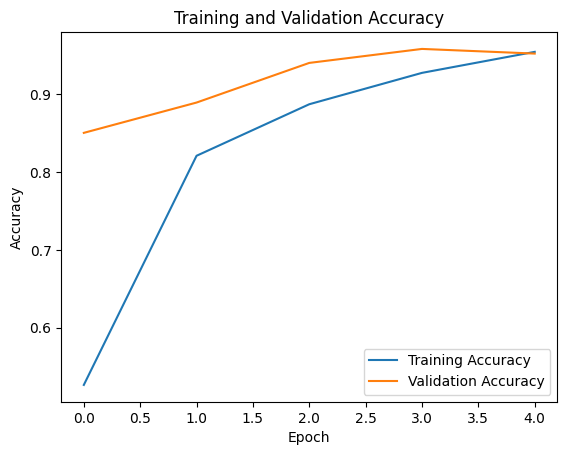

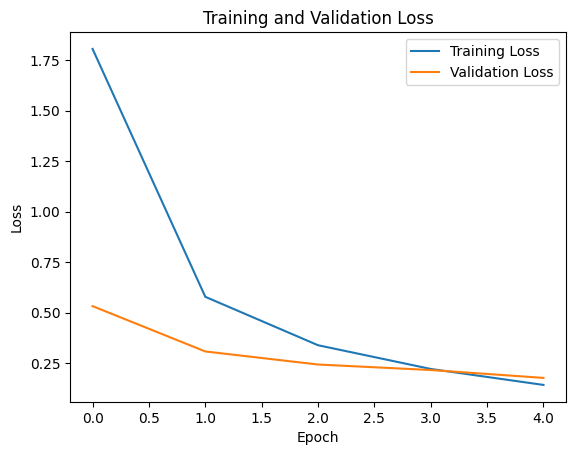

In [58]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [59]:

test_loss, test_accuracy = model.evaluate(test_images)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


 1/11 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.9375 - loss: 0.1113

W0000 00:00:1713775097.205005     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 967ms/step - accuracy: 0.9551 - loss: 0.1345
Test Loss: 0.17794093489646912
Test Accuracy: 0.9520958065986633


W0000 00:00:1713775106.885323     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
